In [1]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import keras


from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.callbacks import Callback, EarlyStopping,ModelCheckpoint

In [2]:
#How many classes do we have?

train_path="Bird_Dataset/train/"
no_birds_classes = os.listdir(train_path)
len(no_birds_classes)

300

In [3]:
data_dir = pathlib.Path("Bird_Dataset/train")
BirdClasses = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(BirdClasses)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'AFRICAN CROWNED CRANE'
 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH' 'AFRICAN OYSTER CATCHER'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET'
 'AMERICAN BITTERN' 'AMERICAN COOT' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTILLEAN EUPHONIA' 'APAPANE'
 'ARARIPE MANAKIN' 'ASIAN CRESTED IBIS' 'AVADAVAT' 'AZURE TANAGER'
 'AZURE TIT' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE ORIOLE' 'BANANAQUIT'
 'BANDED BROADBILL' 'BANDED STILT' 'BAR-TAILED GODWIT' 'BARN OWL'
 'BARN SWALLOW' 'BARRED PUFFBIRD' 'BARROWS GOLDENEYE'
 'BAY-BREASTED WARBLER' 'BEARDED BELLBIRD' 'BELTED KINGFISHER'
 'BIRD OF PARADISE' 'BLACK & YELLOW  BROADBILL' 'BLACK COCKATO'
 'BLACK FRANCOLIN' 'BLACK SKIMMER' 'BLACK SWAN' 'BLACK VULTURE'
 'BLACK-NECKED GREBE' 'BLACK-THROATED SPARROW' 'BLACKBURNIAM WARBLER'
 'BLUE COAU' 'BLUE TH

In [4]:
#Visualizing Images

def view_random_image(target_dir, target_class):
  
    # setting up the image directory
    target_folder = target_dir + target_class

    #get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    #read image and plotting it
    img = plt.imread(target_folder + "/" + random_image[0] )
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    #print(f"Image shape: {img.shape}")
  
    return img

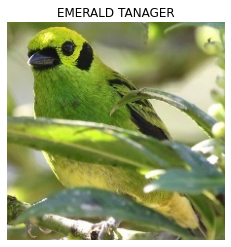

In [5]:
img = view_random_image(train_path,'EMERALD TANAGER')

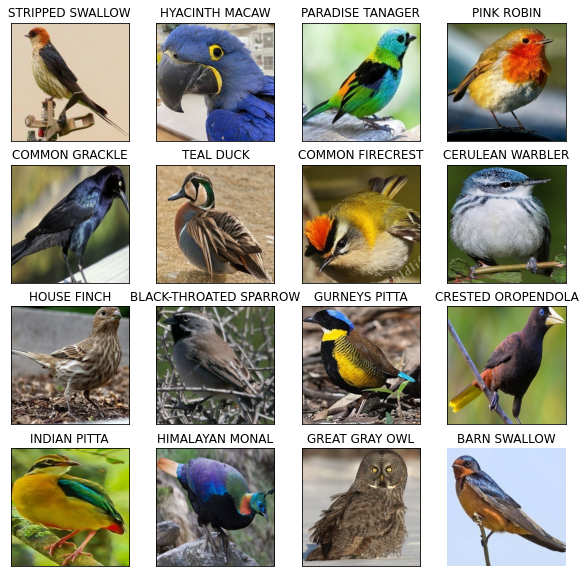

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

random_index = np.random.randint(0 , len(BirdClasses)-1 , 16)

for i, ax in enumerate(axes.flat):
    ax.imshow(view_random_image(train_path,BirdClasses[random_index[i]]))
    ax.set_title(BirdClasses[random_index[i]])

In [7]:
#Data Preprocessing

train_dir = "Bird_Dataset/train/"
val_dir = "Bird_Dataset/valid/"

In [8]:
from keras.applications.xception import Xception

In [9]:
# 設定批量生成器
train_gen = ImageDataGenerator(rescale=1./255)
#test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory( train_dir , target_size=(224,224) , batch_size=32 , class_mode = "categorical" ,shuffle=True )

val_data = val_gen.flow_from_directory( val_dir , target_size=(224,224) , batch_size=32 , class_mode = "categorical" , shuffle=True )

#test_data = test_gen.flow_from_directory( test_dir , target_size=(224,224) , batch_size=32 , class_mode = "categorical" ,shuffle=False )

Found 43857 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.


In [10]:
#Preparing MobileNet Pretrained Model 載入Keras模型
xceptionnet = Xception(include_top=False , weights="imagenet" , input_shape=(224,224,3))

xceptionnet.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [11]:
#Fine-Tuning MobileNet Model

# Freezing all layers except the last 20 layers

xceptionnet.trainable=True

for layer in xceptionnet.layers[:-20]:
    layer.trainable=False

In [12]:
Model = Sequential([
    xceptionnet,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    #Dense(400,activation='softmax')
    Dense(300,activation='softmax')
])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                        

In [13]:
# 編譯模型
Model.compile(optimizer="adam", loss="categorical_crossentropy" , metrics=["accuracy"] )

In [14]:
# Create Callback Checkpoint

#checkpoint_path = "BirdsSpecies_Model_Checkpoint"
#checkpoint_callback = ModelCheckpoint(checkpoint_path,monitor="val_accuracy",save_best_only=True)

callbacks = [EarlyStopping(monitor='val_accuracy' , patience=5 , restore_best_weights=True)]

In [15]:
# 重新訓練權重
history = Model.fit(train_data, epochs=15, batch_size=32, steps_per_epoch = len(train_data), callbacks=callbacks, workers=8, use_multiprocessing=False, validation_data=val_data, validation_steps = len(val_data))

Epoch 1/15
1371/1371 [==============================] - 2289s 2s/step - loss: 0.9640 - accuracy: 0.7768 - val_loss: 0.2137 - val_accuracy: 0.9373
Epoch 2/15
1371/1371 [==============================] - 2331s 2s/step - loss: 0.3076 - accuracy: 0.9133 - val_loss: 0.1783 - val_accuracy: 0.9427
Epoch 3/15
1371/1371 [==============================] - 2363s 2s/step - loss: 0.2096 - accuracy: 0.9400 - val_loss: 0.2493 - val_accuracy: 0.9333
Epoch 4/15
1371/1371 [==============================] - 2335s 2s/step - loss: 0.1628 - accuracy: 0.9521 - val_loss: 0.1534 - val_accuracy: 0.9573
Epoch 5/15
1371/1371 [==============================] - 2330s 2s/step - loss: 0.1325 - accuracy: 0.9596 - val_loss: 0.1375 - val_accuracy: 0.9567
Epoch 6/15
1371/1371 [==============================] - 2280s 2s/step - loss: 0.1131 - accuracy: 0.9662 - val_loss: 0.1309 - val_accuracy: 0.9633
Epoch 7/15
1371/1371 [==============================] - 2250s 2s/step - loss: 0.0944 - accuracy: 0.9710 - val_loss: 0.1315 -

In [16]:
#Evaluating The Model

#results = Model.evaluate(test_data, verbose=0)
results = Model.evaluate(val_data, verbose=0)


print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.10320
Test Accuracy: 97.20%


In [17]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.figure() 
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    plt.tight_layout()

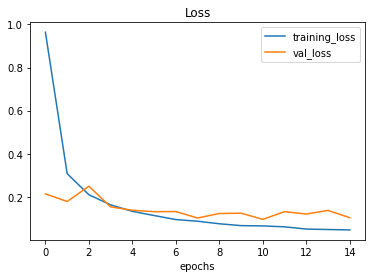

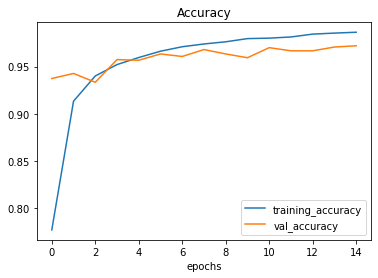

<Figure size 432x288 with 0 Axes>

In [18]:
plot_curves(history)

In [19]:
#儲存模型
Model.save("BirdSpecies_Xception_Jeremy.h5")

In [21]:
Model.save_weights("BirdSpecies_model.weight")

In [25]:
json_string = Model.to_json()
with open("BirdSpecies_model.config", "w") as text_file:
    text_file.write(json_string)